In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\user\OneDrive - Dickinson College\Senior Sem Spring 2025\DATA 400\DATA400FP\D400FP_Shipping_Data.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print columns to check if 'delivery_time' exists
print("Columns in dataset:", df.columns.tolist())

# Feature selection and preprocessing
features = ['shipping_distance_km', 'order_weight_kg', 'warehouse_processing_time_hours', 
            'traffic_conditions_index', 'historical_delays_hours']
target = 'delivery_time_hours'

# Ensure 'shipping_mode' exists before applying one-hot encoding
if 'shipping_mode' in df.columns:
    df = pd.get_dummies(df, columns=['shipping_mode'], drop_first=True)
    shipping_mode_dummies = [col for col in df.columns if col.startswith('shipping_mode_')]
    features.extend(shipping_mode_dummies)

# Ensure target column exists
if target not in df.columns:
    raise KeyError(f"Column '{target}' not found in DataFrame! Available columns: {df.columns.tolist()}")

# Define X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


Columns in dataset: ['shipping_distance_km', 'order_weight_kg', 'shipping_mode', 'warehouse_processing_time_hours', 'traffic_conditions_index', 'historical_delays_hours', 'delivery_time_hours']
MAE: 48.152795748792954, MSE: 3131.279370061775, RMSE: 55.957835644901195


C:\Users\user\AppData\Local\Temp\ipykernel_16736\1535694471.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


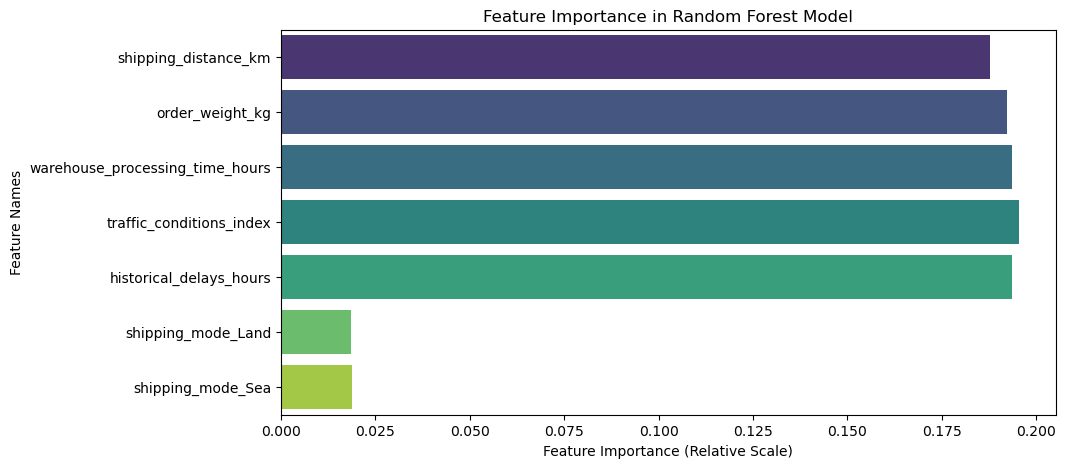

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance (Relative Scale)")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest Model")
plt.show()


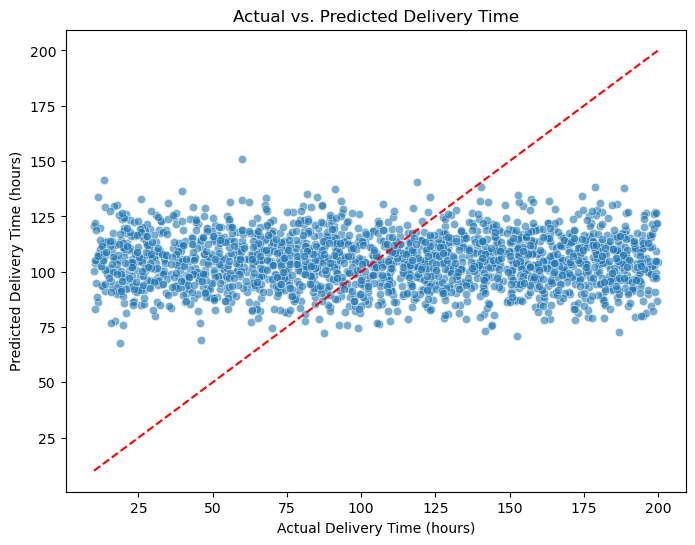

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect predictions line
plt.xlabel("Actual Delivery Time (hours)")
plt.ylabel("Predicted Delivery Time (hours)")
plt.title("Actual vs. Predicted Delivery Time")
plt.show()


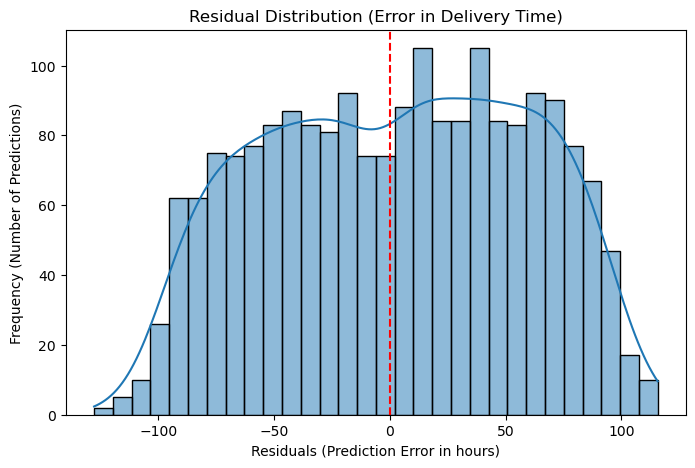

In [40]:
residuals = y_test - y_pred  # Difference between actual and predicted

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Prediction Error in hours)")
plt.ylabel("Frequency (Number of Predictions)")
plt.title("Residual Distribution (Error in Delivery Time)")
plt.show()



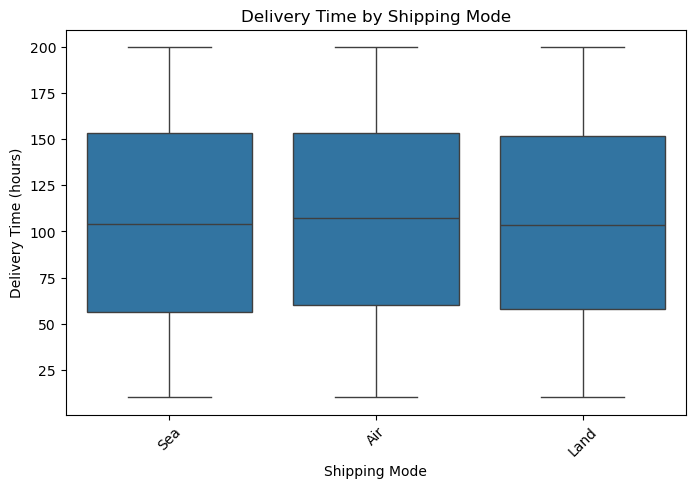

In [44]:
df_original = pd.read_csv(r"C:\Users\user\OneDrive - Dickinson College\Senior Sem Spring 2025\DATA 400\DATA400FP\D400FP_Shipping_Data.csv")

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_original["shipping_mode"], y=df_original["delivery_time_hours"])
plt.xlabel("Shipping Mode")
plt.ylabel("Delivery Time (hours)")
plt.title("Delivery Time by Shipping Mode")
plt.xticks(rotation=45)
plt.show()




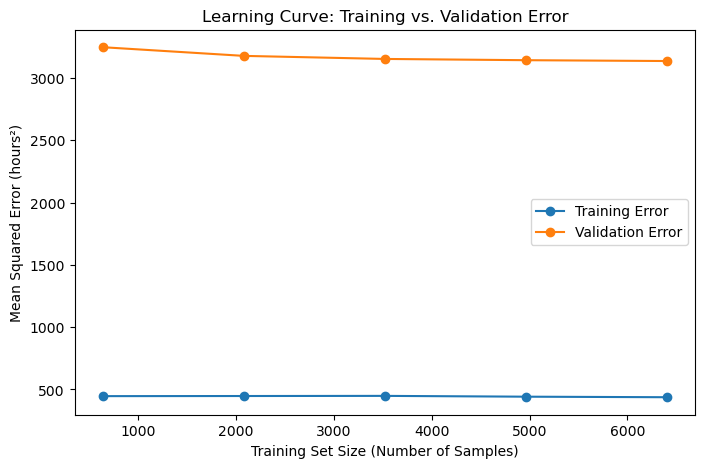

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="o")
plt.xlabel("Training Set Size (Number of Samples)")
plt.ylabel("Mean Squared Error (hours²)")
plt.title("Learning Curve: Training vs. Validation Error")
plt.legend()
plt.show()

